In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("tlc_por_pickup.csv")

In [30]:
df.shape

(33591, 11)

In [20]:
# Convierte la columna 'pickup_datehour' a formato de fecha y hora
df['pickup_datehour'] = pd.to_datetime(df['pickup_datehour'])

# Crea una nueva columna 'day_of_week' que contiene el día de la semana en texto
df['day_of_week'] = df['pickup_datehour'].dt.day_name()

# Extrae las columnas de año, mes y hora
df['year'] = df['pickup_datehour'].dt.year
df['month'] = df['pickup_datehour'].dt.month
df['hour'] = df['pickup_datehour'].dt.hour

In [21]:
# Convierte 'day_of_week' a one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day').astype("int")

In [23]:
df.drop(columns=["pickup_datehour"], inplace=True)

In [24]:
df.head()

,num_trips,year,month,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,56414,2020,1,0,0,0,0,0,0,0,1
1,67707,2020,1,1,0,0,0,0,0,0,1
2,65258,2020,1,2,0,0,0,0,0,0,1
3,57364,2020,1,3,0,0,0,0,0,0,1
4,40178,2020,1,4,0,0,0,0,0,0,1


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Selecciona las características (X) y la variable objetivo (y)
X = df.drop(['num_trips'], axis=1)  # Excluye la variable objetivo y el datetime
y = df['num_trips']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza las características (opcional, dependiendo del modelo que elijas)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crea un modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Entrenar el modelo final con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Cross-Validated Mean Squared Error: {cv_mse}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Ahora puedes utilizar el modelo entrenado (rf_model) para hacer predicciones en nuevos datos
# Ajusta y adapta según sea necesario para tu caso específico


Cross-Validated Mean Squared Error: 14109935.803479766
Mean Squared Error: 12369220.060533471
R2 Score: 0.8943983913056492


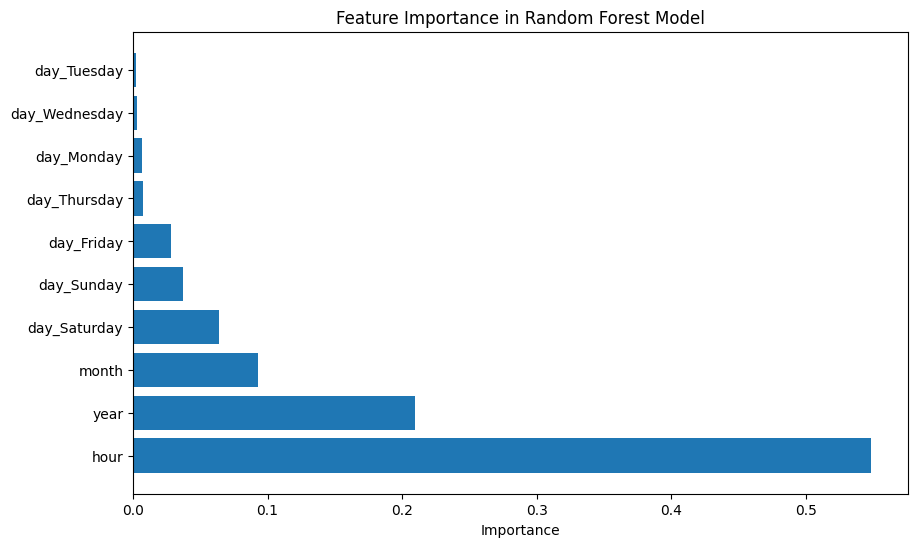

In [29]:
# Obtiene la importancia de las características
feature_importance = rf_model.feature_importances_

# Crea un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualiza la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [33]:
df.tail()

,num_trips,year,month,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
33586,35407,2023,10,19,0,0,0,0,0,1,0
33587,34604,2023,10,20,0,0,0,0,0,1,0
33588,33071,2023,10,21,0,0,0,0,0,1,0
33589,31937,2023,10,22,0,0,0,0,0,1,0
33590,28621,2023,10,23,0,0,0,0,0,1,0
